# 190328V
# KUMARA B.W.J.C

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


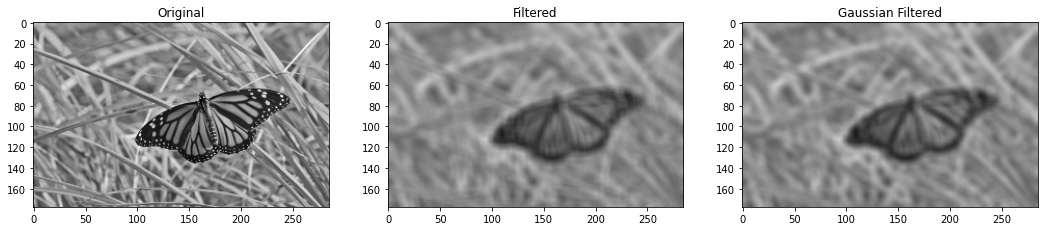

In [51]:
#Q1

im = cv.imread(r'butterfly.jpg',cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

k_size = 9
sigma =4
box_kernel = 1./81*np.ones((k_size,k_size)) 
im_avg = cv.filter2D(im,-1,box_kernel)

im_gaussian = cv.GaussianBlur(im,(k_size,k_size),sigma)

fig , ax  = plt.subplots(1,3,figsize=(18,6),facecolor = 'white')
ax[0].imshow(im,cmap = 'gray',vmin = 0, vmax =255)
ax[0].set_title('Original')
ax[1].imshow(im_avg,cmap = 'gray',vmin = 0, vmax =255)
ax[1].set_title('Filtered')
ax[2].imshow(im_gaussian,cmap = 'gray',vmin = 0, vmax =255)
ax[2].set_title('Gaussian Filtered')
plt.show()

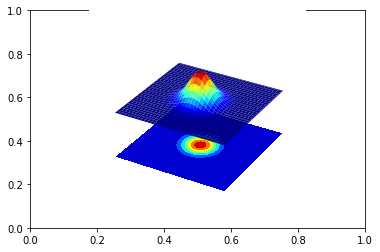

In [49]:
#Q2

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig , ax  = plt.subplots(facecolor = 'white')
ax = fig.add_subplot(111,projection ='3d')

step = 0.1
X = np.arange(-5,5+step,step)
Y = np.arange(-5,5+step,step)
XX,YY = np.meshgrid(X,Y)
sigma = 1.
g = np.exp(-(XX**2+YY**2)/(2*sigma**2))

surf = ax.plot_surface(XX,YY,g,cmap=cm.jet)

cset = ax.contourf(XX,YY,g,zdir ='z',offset = np.min(g)-1.5,cmap = cm.jet)
ax.set_zlim(np.min(g)-2,np.max(g))
plt.axis('off')
plt.show()

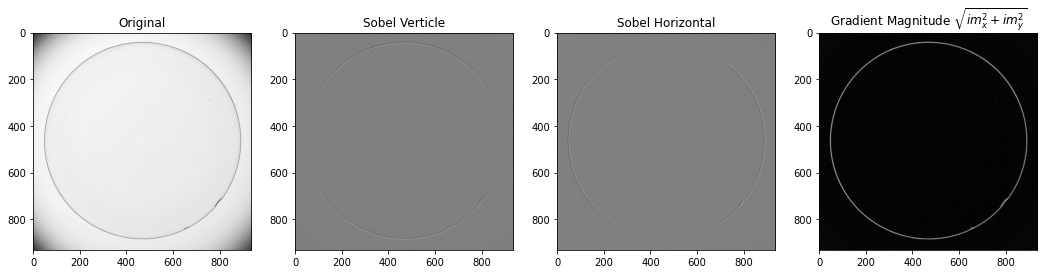

In [35]:
#Q03


f = cv.imread(r'contact_lens.tif',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype= np.float32)
im_x = cv.filter2D(f,-1,sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype= np.float32)
im_y = cv.filter2D(f,-1,sobel_h)

grad_mag =np.sqrt(im_x**2+im_y**2)

fig , ax  = plt.subplots(1,4,figsize=(18,6),facecolor = 'white')
ax[0].imshow(f,cmap = 'gray',vmin = 0, vmax =255)
ax[0].set_title('Original')
ax[1].imshow(im_x,cmap = 'gray',vmin = -1020, vmax =1020)
ax[1].set_title('Sobel Verticle')
ax[2].imshow(im_y,cmap = 'gray',vmin = -1020, vmax =1020)
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(grad_mag,cmap = 'gray')
ax[3].set_title('Gradient Magnitude $\sqrt{im_x^2+ im_y^2}$')
plt.show()

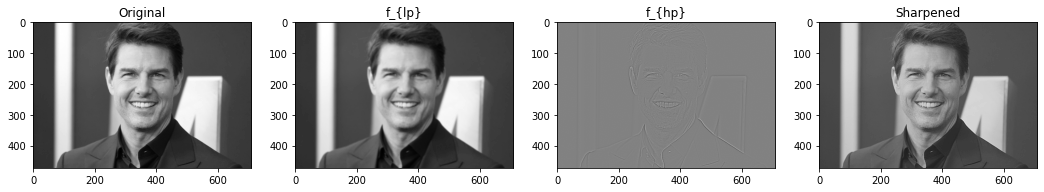

In [56]:
#Q04

f = cv.imread(r'tom.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sigma = 2
gaussian_1d = cv.getGaussianKernel(5,sigma=sigma)
f_lp = cv.sepFilter2D(f,-1,gaussian_1d,gaussian_1d)
f_hp = f -f_lp

f_sharpened =  cv.addWeighted(f,2.0,f_hp,2.0,0)

fig , ax  = plt.subplots(1,4,figsize=(18,6),facecolor = 'white')
ax[0].imshow(f,cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(f_lp,cmap = 'gray')
ax[1].set_title(r'f_{lp}')
ax[2].imshow(f_hp,cmap = 'gray')
ax[2].set_title(r'f_{hp}')
ax[3].imshow(f_sharpened,cmap = 'gray')
ax[3].set_title(r'Sharpened')
plt.show()
